# Assignment 2 - DIY LINEAR REGRESSOR!

*This assignment is a part of the project ["Customer Churn Analysis: From Data To Strategy"]*


1.   ## Part-1
In this part, you'll build your own linear regression from scratch by 2 methods that were discuseed in class.

  * OLS (Ordinary Least Square) - This method directly calculates the values of the coefficients in equation y=mx+c.
  * Gradient Descent - This method uses an iterative approach to calculate the values of the coefficients. You'll have to calculate the values of both m and b.
2.   ## Part-2
In this part, you'll get predictions from the model you just built. You'll then evaluate the predictions by following metrics:

    * [R2 Score](https://www.investopedia.com/terms/r/r-squared.asp)
    * [MEAN ABSOLUTE ERROR and ROOT MEAN SQUARED ERROR](https://towardsdatascience.com/what-are-rmse-and-mae-e405ce230383)
3.  ## Part-3
In this part, you'll have to answer some subjective questions.







If you are stuck or have any doubts, please feel free to put your queries on the Whatsapp group.


Deadline : **31 May, 11:59 pm**


# Import necessary libraries
Feel free to modify it as per your requirements.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from google.colab import files

# Upload the file
# uploaded = files.upload()


# Part-1


### Linear Regressor with OLS method

In [2]:
class MyLRFromOLS:


  def __init__(self):
      self.m = None
      self.b = None

  def fit(self,X_train,y_train):

    # Calculate values of m and b
    # Ensure X_train and y_train are numpy arrays
    X_train = np.array(X_train)
    y_train = np.array(y_train)

    # Calculate the means of X_train and y_train

    mean_x = np.mean(X_train)
    mean_y = np.mean(y_train)
    y_train=y_train- y_train.min()/ y_train.max()-y_train.min()
    X_train=X_train- X_train.min()/ X_train.max()-X_train.min()

    # Calculate the terms needed for the numerator and denominator of m

    num =(((X_train)*y_train).mean() - (X_train.mean()*y_train.mean()))
    denom = (((X_train**2).mean()-(X_train.mean())**2))

     # Calculate slope (m) and intercept (b)

    self.m = num / denom
    self.b =y_train.mean()-(self.m)*X_train.mean()


  def predict(self,X_test):
    # Ensure X_test is a numpy array

     X_test = np.array(X_test)
     return self.m * X_test + self.b

  def get_coeff(self):
    print(f"Slope (m): {self.m}")
    print(f"Intercept (b): {self.b}")

    # Write code to print the value of m and b

In [4]:
#load dataset
data = pd.read_csv('tvmarketing.csv')
data.head()


,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
# Separate input and output columns
X =data.TV
y =data.Sales

In [6]:
# Train test split of 80/20. Try changing the ratio and see what results you get

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

  ### Prediction time

In [7]:
olslr = MyLRFromOLS()


In [8]:
olslr.fit(X_train,y_train)

In [9]:
olslr_pred = olslr.predict(X_test)

In [10]:
#View predictions
print( olslr_pred)

[14.16102998  8.64766466  7.89226542 17.11967702 13.69415128 15.0790499
  8.4116024  18.72490042  8.88372693 20.19373228  6.19261712 16.36427778
 10.05879242  5.35328463 16.6108317   5.84639247  6.26081288 12.89153959
 15.9393657  15.65084516 16.92033556 18.73539207  7.96046118  6.8798206
 17.2455769  13.77808453 14.12955501  8.56373141 16.86263145 16.69476495
 19.45931635 11.82139066 15.42527455 12.08892789  5.22738475 10.70402927
 16.50066931 17.974747   18.85604612 14.52299212]


In [11]:
#Get values of m and b
olslr.get_coeff()

Slope (m): 0.05245828085802821
Intercept (b): 4.944110035319089


### Linear Regressor with gradient descent


In [12]:
class MyLRFromGD:

  def __init__(self,learning_rate,epochs):
     self.m =  np.random.rand() #assign random value
     self.b  = np.random.rand() #assign random value

     self.lr = learning_rate
     self.epochs = epochs

  def fit(self,X_train,y_train):


      # calcualte b and m using GD

      y_train=y_train- y_train.min()/ y_train.max()-y_train.min()
      X_train=X_train- X_train.min()/ X_train.max()-X_train.min()
      n = len(y_train)  # Number of training examples
      for i in range(self.epochs):
        y_pred = self.m * X_train + self.b
        # Calculate slope wrt b and m
        loss_slope_b = -(2/n) * np.sum(y_train - y_pred)
        loss_slope_m = -(2/n) * np.sum((y_train - y_pred) * X_train)

        self.b = self.b - (self.lr * loss_slope_b)
        self.m = self.m - (self.lr * loss_slope_m)


  def predict(self,X_test):

    return self.m * X_test + self.b

  def get_coeff(self):
    return self.m, self.b
    #Write code to get values of m and b


### Prediction Time
Since we have already split the dataset, we're not going to repeat it again.

In [13]:
#Check with different values of learning_rate and epochs for model convergence
learning_rate=1e-7
epochs=10000
gdlr = MyLRFromGD(learning_rate,epochs)

In [14]:
gdlr.fit(X_train,y_train)

In [15]:
gdlr_pred = gdlr.predict(X_train)

In [16]:
# View predictions
predictions = gdlr.predict(X_train)



In [17]:
# Get values of m and b
gdlr.get_coeff()

(0.07523013472552369, 0.5065005273955483)

In [18]:
# Compare values of m and b obtained from both methods
# X = data.TV
# y = data.Sales
# b=0.15232721254607365
# m=0.07704759589580419


# z=m*X+b
# mt.scatter(X,y,color='blue', marker='o')

# m2=0.05245828085802822
# b2= 6.566524608650464

# z1=m2*X+b2
# mt.scatter(X,y,color='blue', marker='o')
# mt.plot(X,z)
# mt.plot(X,z1)


NameError: name 'mt' is not defined

# Part-2

### R2 Score
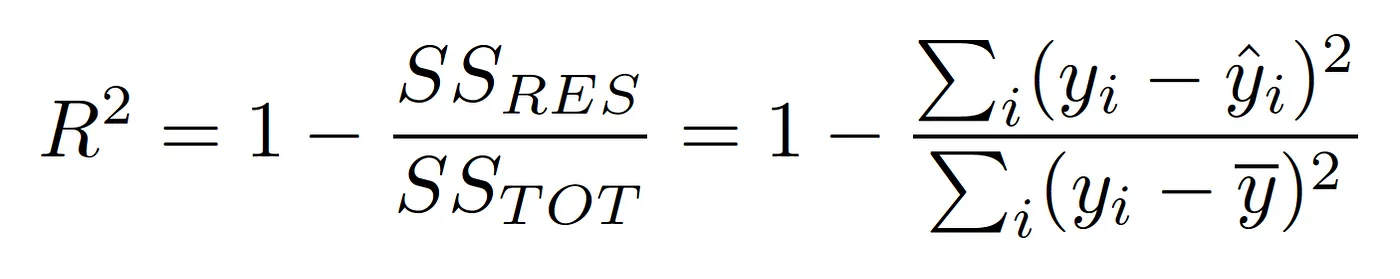

### MEAN ABSOLUTE ERROR
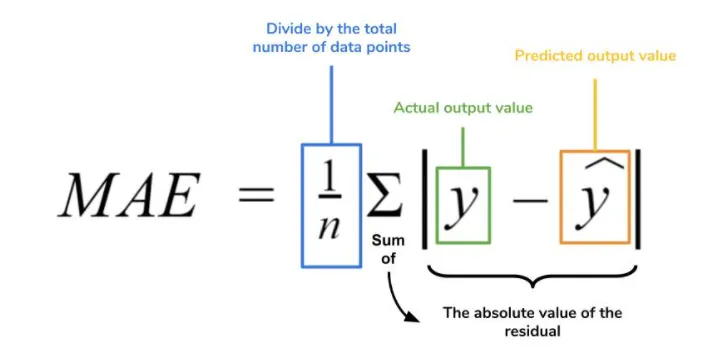

### ROOT MEAN SQUARED ERROR
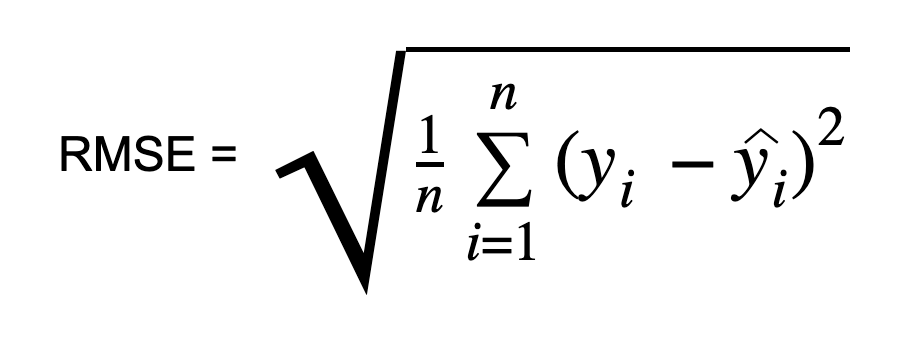

### Evaluation time
Let's see how does both of our models perform.

In [36]:
# Implement R2 Score, MAE and RMSE

class evaluate:

  def __init__(self,y_pred,y_test):
    self.y_pred = y_pred
    self.y_test = y_test

  def r2score(self):

    ss_total = np.sum((self.y_test - np.mean(self.y_test)) ** 2)
    ss_residual = np.sum((self.y_test - self.y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

    #Write code here


  def mae(self):
    mae = np.mean(np.abs(self.y_test - self.y_pred))
    return mae

    #Write code here


  def rmse(self):
    rmse = np.sqrt(np.mean((self.y_test - self.y_pred) ** 2))
    return rmse

    #write code here


In [37]:
# First calculate all the metrics for olslr_pred

eval1=evaluate(olslr_pred,y_test)










In [38]:
eval1.r2score()

0.042179776427879956

In [39]:
eval1.mae()

3.2353682995006396

In [40]:
eval1.rmse()

4.218162337535139

In [41]:
# Now for gdlr_pred
eval2=evaluate(predictions,y_test)


In [42]:
eval2.r2score()

1.0

In [43]:
eval2.mae()

nan

In [44]:
eval2.rmse()

nan

# Part-3
In this part you'll have to answer the questions provided in the below google form:

[Questions](https://forms.gle/2KfpQNvmf5fd9MTw9)

**After Submitting the form, you are required to paste the screenshot of the form.**

## Steps to add screenshot:


1.   Take the screenshot of the submitted form.
2.   Now create a text block below this block in whichever IDE you are using, for example, if you are using VS Code, you will get 2 options below and above each block, Code and Markdown, chose the **Markdown** one.
3.   Now insert the image and run the cell.

### Voila!



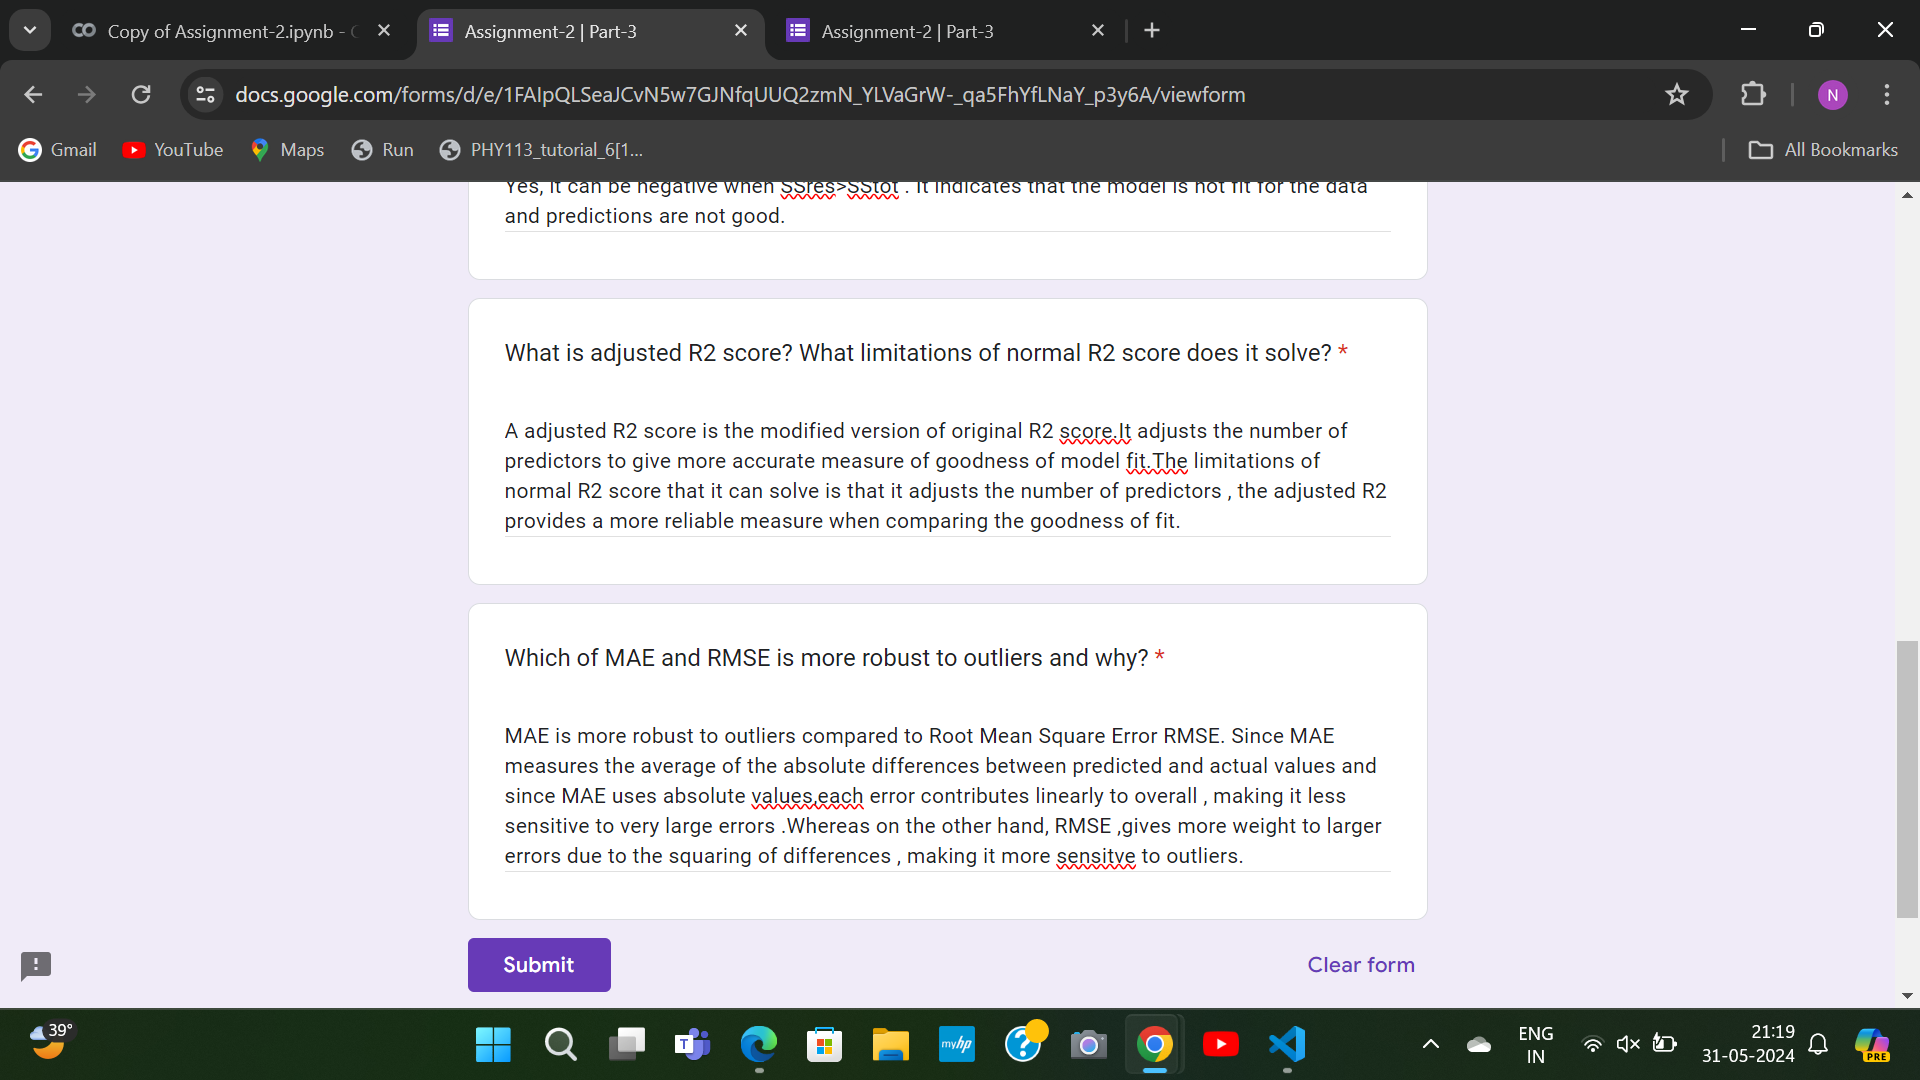

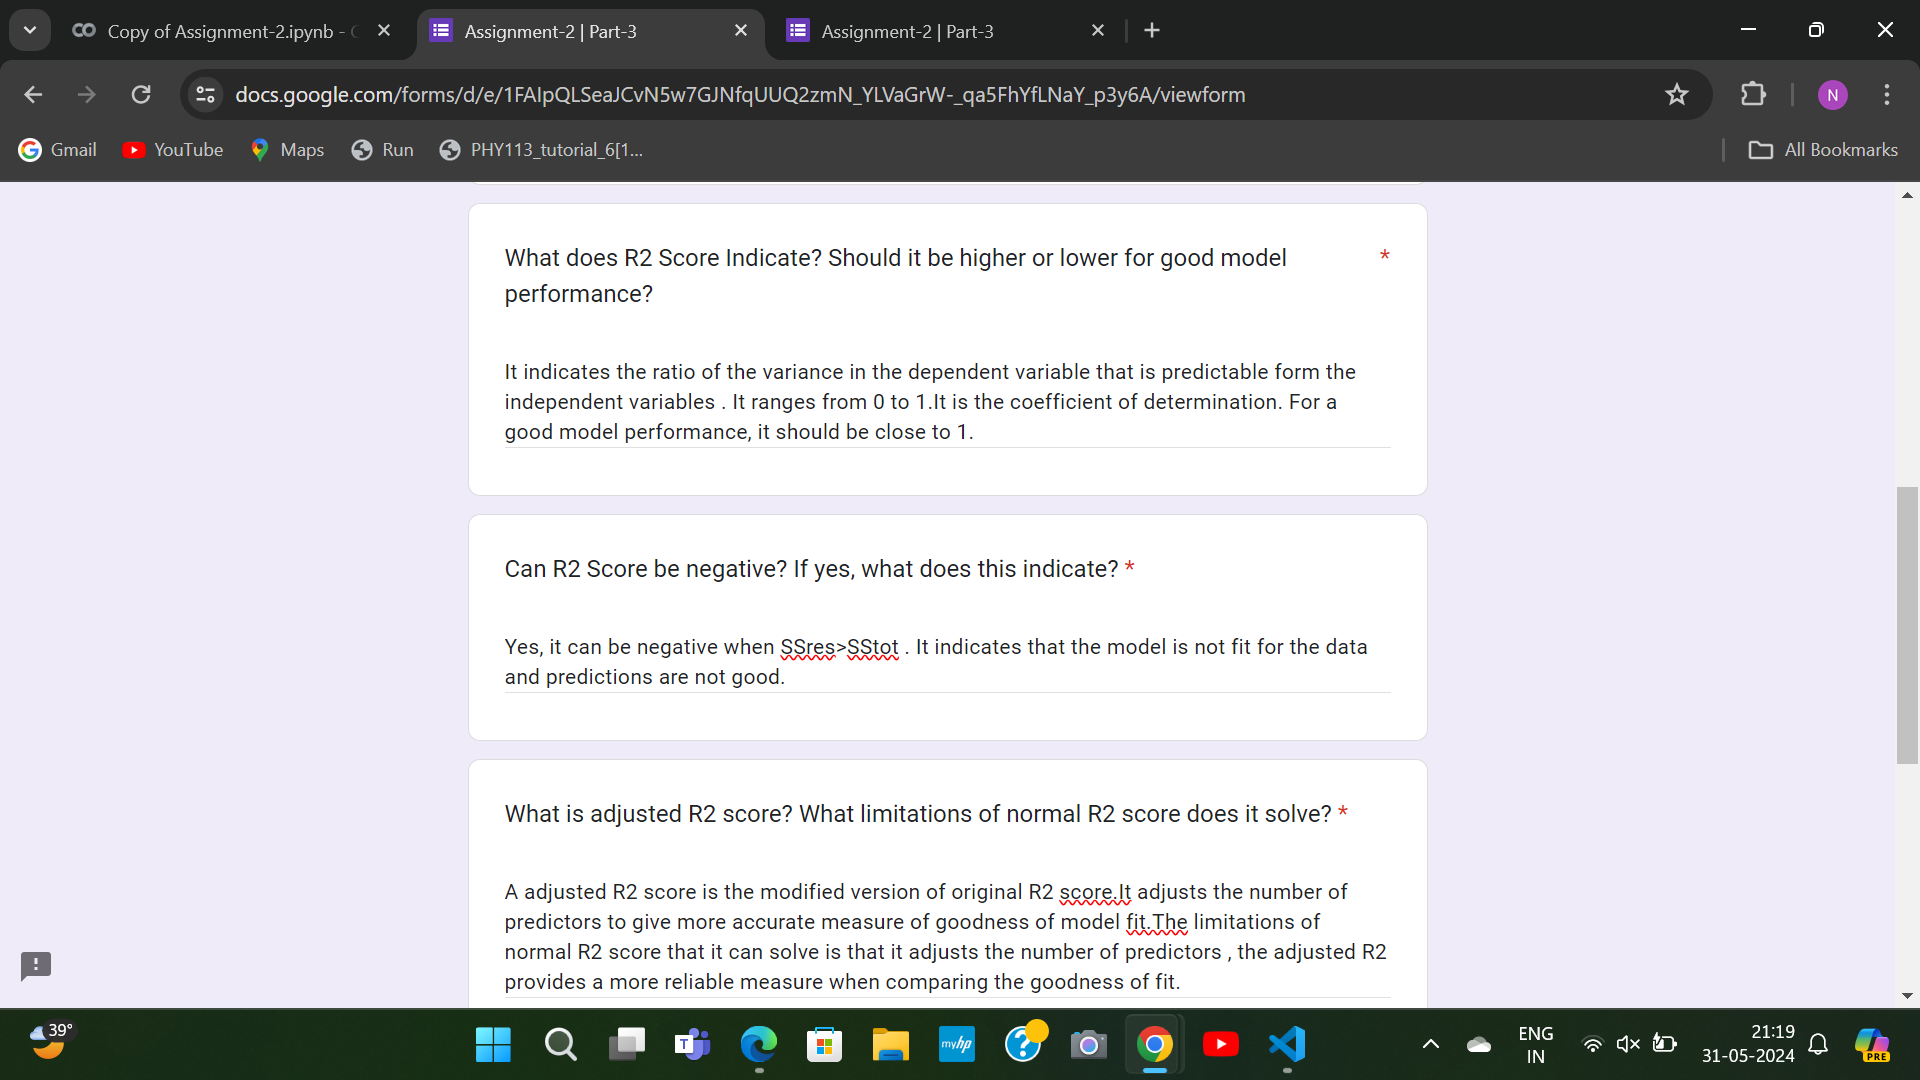